# 2) Momento Inercial

In [398]:
import csv

# Nombre del archivo CSV
archivo_csv = "inercia.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "T (s) (+- 0,01)": [1.16, 1.32, 1.46, 1.56, 1.64]
Columna "(T/2pi)^2": [0.0341, 0.0441, 0.054, 0.0616, 0.0681]
Columna "N discos": [0.0, 2.0, 4.0, 6.0, 8.0]


In [399]:
X = columnas["N discos"] # adimensional
X

[0.0, 2.0, 4.0, 6.0, 8.0]

In [400]:
Y = columnas["(T/2pi)^2"] #s^2
Y

[0.0341, 0.0441, 0.054, 0.0616, 0.0681]

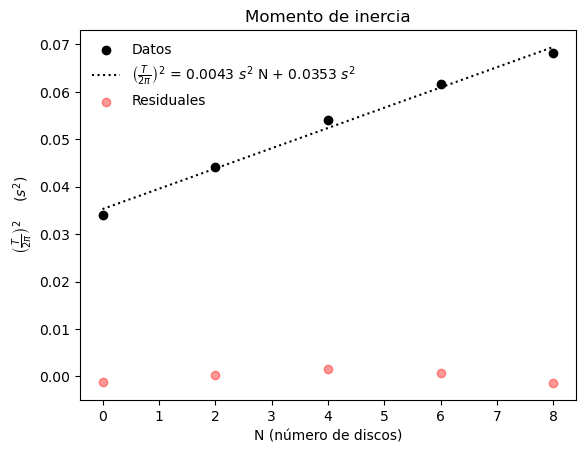

La incertidumbre en el pendiente es de 0.0002 s^2
La incertidumbre en el intercepto es de 0.0011 s^2


In [401]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = r"$\left(\frac{T}{2\pi}\right)^2$"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y, label='Datos', color='black')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f} $s^2$ N + {intercept:.4f} $s^2$', color='black',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='red')

plt.xlabel('N (número de discos)')
plt.ylabel(r'$\left(\frac{T}{2\pi}\right)^2 \; \; \; \; \; (s^2)$')
plt.title('Momento de inercia')
legend = plt.legend()
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda

# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m,4)} s^2")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)} s^2")

In [402]:
import sympy as sp

def propagacion_de_error(expr, variables, errores):
    """
    Calcula el error propagado para una expresión dada utilizando el método de derivadas parciales.

    Parámetros:
        expr (str): La expresión matemática en forma de cadena.
        variables (list): Lista de símbolos de las variables en la expresión.
        errores (list): Lista de los errores asociados a cada variable.

    Retorna:
        float: Expreseion del del error propagado.
    """
    # Convertir las cadenas a símbolos de sympy
    symbols = sp.symbols(variables)
    expr = sp.sympify(expr)
    
    # Calcular el error propagado utilizando derivadas parciales
    derivadas = [sp.diff(expr, var) for var in symbols]
    error_propagado = sp.sqrt(sum([(derivada * error)**2 for derivada, error in zip(derivadas, errores)]))
    
    return error_propagado.evalf()


In [403]:
r = 1.99E-2 #Radio interno del disco en m
dr = 1.00E-4 #Incertidumbre en el radio interno del disco en m

R= 4.55E-2 #Radio externo del disco en m
dR = 1.00E-4 #Incertidumbre en el radio externo del disco en m

M = 212.0E-3 #Masa del disco en Kg
dM = 0.1E-3 #Incertidumbre en la masa del disco en Kg

m = round(slope,4) #Pendiente de la regreción en s^2
dm = round(delta_m,4) #Incertidumbre en la pendiente de la regreción en s^2

b = round(intercept,4) #Intercepto en y de la regreción en s^2
db = round(delta_b,4) #Incertidumbre en el intercepto en y de la regreción en s^2


#Propagacion de error del momento de inercia de un disco DI

DI = (1/2)*(M)*(r**2 + R**2) #Momento de inercia de un disco en Kg m^2
pre_prop_DI = "(1/2)*(M)*(r**2 + R**2)"
var_DI = ['M', 'r', 'R']
errs_DI = [dM, dr, dR]
prop_DI = propagacion_de_error(pre_prop_DI, var_DI, errs_DI)

prop_DI

0.0001*(M**2*R**2 + M**2*r**2 + 0.25*(R**2 + r**2)**2)**0.5

In [404]:
#Inecetidumbre en el momento de inercia de un disco en Kg m^2
dDI = 0.0001 * np.sqrt((M*R)**2 + (M*r)**2 + 0.25*(r**2 + R**2)**2)

print(round(DI,6),round(dDI,6))

0.000261 1e-06


Tenga en cuenta que el valor reportado por la literatura para $\Delta I$ es $0.000195 Kg m^2$

In [405]:
#Propagacion de error de la contante de torsion 

k = DI/m #Contante de torsion en N m/rad
pre_prop_k = "DI/m"
var_k = ['DI', 'm']
errs_k = [dDI, dm]
prop_k = propagacion_de_error(pre_prop_k, var_k, errs_k)

prop_k

0.0002*(DI**2/m**4 + 2.8091049759225e-5/m**2)**0.5

In [406]:
#Inecetidumbre en la contante de torsion en N m/rad
dk = 0.0002 * np.sqrt((DI/(m**2) )**2 + ( (2.81E-5)/(m**2) ))

print(round(k,4),round(dk,4))

0.0608 0.0028


In [407]:
#Propagacion de error del momento de inercia inicial

I = b*k #Momento de inercia inicialen Kg m^2
pre_prop_I = "b*k"
var_I = ['b', 'k']
errs_I = [db, dk]
prop_I = propagacion_de_error(pre_prop_I, var_I, errs_I)

prop_I

0.00283845763872128*(b**2 + 0.150182917205076*k**2)**0.5

In [408]:
#Inecetidumbre en la contante de torsion en N m/rad
dI = 0.00028 * np.sqrt(b**2 + 0.15*(k**2) )

print(round(I,5),round(dI,5))

0.00215 1e-05


# 4) Amortiguamiento

El movimineto amortigado debe ser de la forma:

$$ \theta(t) = C e^{-\gamma \omega_0 t} \cos(\omega_0 t \sqrt{1-\gamma^2} +\phi)$$

Entonces si se debe hallar el factor de calidad Q y se sabe que $Q= \omega_{0} / \gamma$ se puede hacer el siguiente fit:

$$ \theta(t) = C e^{-\omega_{0}^{2}t/Q } \cos(\omega_0 t \sqrt{1-(\omega_{0}/Q)^2} +\phi)$$

En este caso $\theta(t)$ pasa por un transductor que convierte la señal en un voltaje el cual se mide en ($mV$) en un tiempo $t$ que se mide en ($s$) . Así, la unidades de $C$ son de $mV$ y $Q$ y $\phi$ son adimensionales. El valor de $\omega_0$ se puede calular con los datos encontrados con anterioridad. Entonces, buscamos una regericion de la forma:

$$ V(t) = a e^{bt } \cos(c t + d) + e $$

Donde el valor de interes es:

$$ b = -\omega_{0}^{2}/Q  $$

In [409]:
#Propagacion de error de la frecuencia angular natural del sistema en rad/s

omega_0 = np.sqrt(k/I) #Frecuencia angular natural en rad/s
pre_prop_omega_0 = "(k/s)**(1/2)" #por cuestiones de notacion I = s
var_omega_0 = ['k', 's']
errs_omega_0 = [dk, dI]
prop_omega_0 = propagacion_de_error(pre_prop_omega_0, var_omega_0, errs_omega_0)

prop_omega_0

0.00141922881936064*(1.75205718742461e-5*k/s**3 + 1/(k*s))**0.5

In [410]:
#Inecetidumbre en la frecuencia angular natural del sistema en rad/s
domega_0 = 0.0014 * np.sqrt( (1.75E-5)*(k/(I**3)) + 1/(I*k)  )


print(round(omega_0,5),round(domega_0,5))

5.32246 0.12342


In [411]:
#Lectura de los datos de la toma 1 del suboscilador amortiguado

import csv

# Nombre del archivo CSV
archivo_csv_SB1 = "Subamortiguado1.csv"

# Diccionario para almacenar las listas por columna
columnas_SB1 = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv_SB1, newline='', encoding='utf-8') as csvfile_SB1:
    reader = csv.reader(csvfile_SB1)
    
    # Leer la primera fila que contiene los encabezados
    encabezados_SB1 = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado_SB1 in encabezados_SB1:
        columnas_SB1[encabezado_SB1] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas_SB1[encabezados_SB1[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado_SB1, lista in columnas_SB1.items():
    print(f'Columna "{encabezado_SB1}": {lista}')

Columna "t(s)": [-3.84, -3.28, -2.68, -2.12, -1.56, -0.96, -0.36, 0.2, 0.8, 1.36, 2.0, 2.52, 3.12, 3.68]
Columna "V (mV)": [-432.0, 392.0, -312.0, 288.0, -232.0, 208.0, -168.0, 160.0, -120.0, 120.0, -88.0, 88.0, -56.0, 72.0]


In [412]:
# Tiempo para la toma 1 del oscilador subamortiguado en s
t1 = columnas_SB1["t(s)"]
t1 = [elemento - t1[0] for elemento in t1] #se corre a tiempo 0
t1

[0.0,
 0.56,
 1.1599999999999997,
 1.7199999999999998,
 2.28,
 2.88,
 3.48,
 4.04,
 4.64,
 5.2,
 5.84,
 6.359999999999999,
 6.96,
 7.52]

In [413]:
# Voltaje para la toma 1 del oscilador subamortiguado en mV
V1 = columnas_SB1["V (mV)"]
V1

[-432.0,
 392.0,
 -312.0,
 288.0,
 -232.0,
 208.0,
 -168.0,
 160.0,
 -120.0,
 120.0,
 -88.0,
 88.0,
 -56.0,
 72.0]

In [414]:
#Lectura de los datos de la toma 2 del oscilador subamortiguado

import csv

# Nombre del archivo CSV
archivo_csv_SB2 = "Subamortiguado2.csv"

# Diccionario para almacenar las listas por columna
columnas_SB2 = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv_SB2, newline='', encoding='utf-8') as csvfile_SB2:
    reader = csv.reader(csvfile_SB2)
    
    # Leer la primera fila que contiene los encabezados
    encabezados_SB2 = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado_SB2 in encabezados_SB2:
        columnas_SB2[encabezado_SB2] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas_SB2[encabezados_SB2[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado_SB2, lista in columnas_SB2.items():
    print(f'Columna "{encabezado_SB2}": {lista}')

Columna "t(s)": [-3.92, -3.36, -2.76, -2.16, -1.6, -1.0, -0.4, 0.16, 0.76, 1.32, 1.92, 2.48]
Columna "V (mV)": [-456.0, 344.0, -248.0, 192.0, -136.0, 104.0, -72.0, 64.0, -40.0, 32.0, -24.0, 24.0]


In [415]:
# Tiempo para la toma 2 del oscilador subamortiguado en s
t2 = columnas_SB2["t(s)"]
t2 = [elemento - t2[0] for elemento in t2] #se corre a tiempo 0
t2

[0.0,
 0.56,
 1.1600000000000001,
 1.7599999999999998,
 2.32,
 2.92,
 3.52,
 4.08,
 4.68,
 5.24,
 5.84,
 6.4]

In [416]:
# Voltaje para la toma 2 del oscilador subamortiguado en mV
V2 = columnas_SB2["V (mV)"]
V2

[-456.0,
 344.0,
 -248.0,
 192.0,
 -136.0,
 104.0,
 -72.0,
 64.0,
 -40.0,
 32.0,
 -24.0,
 24.0]

Se espera que el $Q$ de la toma 1 ($Q_1$) se más grande que el de la toma 2 ($Q_2$) pues la toma 1 se realizó con menos amortiguamiento

Param_1: 442.8762 ± 3.4838
Param_2: -0.2660 ± 0.0037
Param_3: 5.3855 ± 0.0264
Param_4: 3.2681 ± 0.0774
Param_5: 8.6874 ± 1.2087


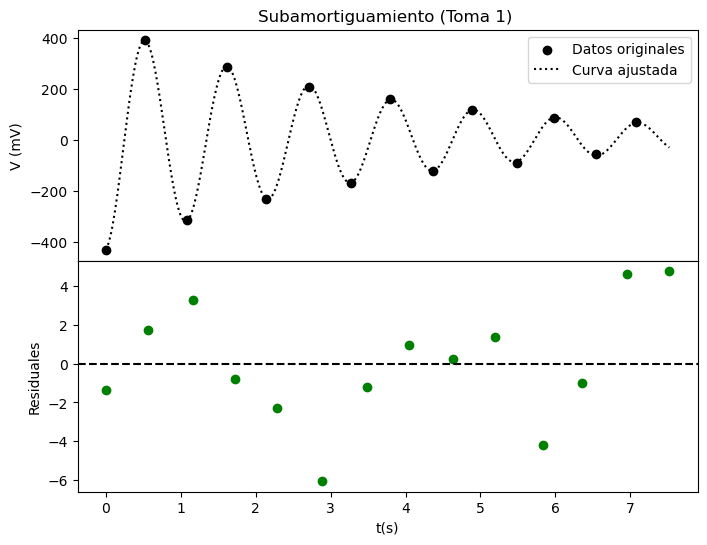

In [445]:
#Ajuste sobre los datos de la toma 1

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función exponencial multiplicada por un coseno
def func(x, a, b, c, d, e):
    return a * np.exp(b * x) * np.cos(c * x + d) + e

x_data = np.array(t1)
y_data = np.array(V1)

# Realizar la regresión no lineal
initial_guess = [x_data[0], -0.1, 4, np.pi, 0]  # Valores iniciales para los parámetros
params, covariance = curve_fit(func, x_data, y_data, p0=initial_guess)

# Calcular las incertidumbres a partir de la diagonal de la matriz de covarianza
param_uncertainties = np.sqrt(np.diag(covariance))

# Imprimir los parámetros ajustados y sus incertidumbres

for i, param in enumerate(params):
    param_name = f'Param_{i+1}'
    uncertainty = param_uncertainties[i]
    print(f'{param_name}: {param:.4f} ± {uncertainty:.4f}')

# Calcular los residuales
residuals = y_data - func(x_data, *params)

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Graficar los datos originales y la curva ajustada

x = np.linspace(0,8,500) #Se genera un dominio para la regreción

ax1.scatter(x_data, y_data, label="Datos originales", color='black')
ax1.plot(x, func(x, *params), label="Curva ajustada", color='black',linestyle='dotted')
ax1.set_xlabel('t(s)')
ax1.set_ylabel('V (mV)')
ax1.legend()
ax1.set_title('Subamortiguamiento (Toma 1) ')

# Graficar los residuales en la parte inferior sin espacio entre los subplots
ax2.plot(x_data, residuals, 'o', color='green')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('Residuales')


# Ajustar los márgenes del segundo subplot
plt.subplots_adjust(hspace=0)

# Mostrar la figura
plt.show()

In [446]:
B_1 = -0.2660
dB_1 = 0.0037
#Propagacion de error del factor de calidad

Q_1 = - (omega_0)**2 /B_1
pre_prop_Q_1 = "(-1)*((1/B_1))*((omega_0)**2)" 
var_Q_1 = ['omega_0','B_1']
errs_Q_1 = [domega_0, dB_1]
prop_Q_1 = propagacion_de_error(pre_prop_Q_1, var_Q_1, errs_Q_1)

prop_Q_1

0.246844124556722*(omega_0**2/B_1**2 + 0.000224676608280047*omega_0**4/B_1**4)**0.5

In [447]:
#Inecetidumbre del factor de calidad
dQ_1 = 0.25 * np.sqrt( (0.00022)*((omega_0/B_1)**4) + (omega_0/B_1)**2  )


print(round(Q_1,5),round(dQ_1,5))

106.49854 5.21797


Param_1: 459.3842 ± 4.5831
Param_2: -0.5095 ± 0.0063
Param_3: 5.3828 ± 0.0879
Param_4: 3.0934 ± 0.1091
Param_5: 3.3902 ± 0.9247


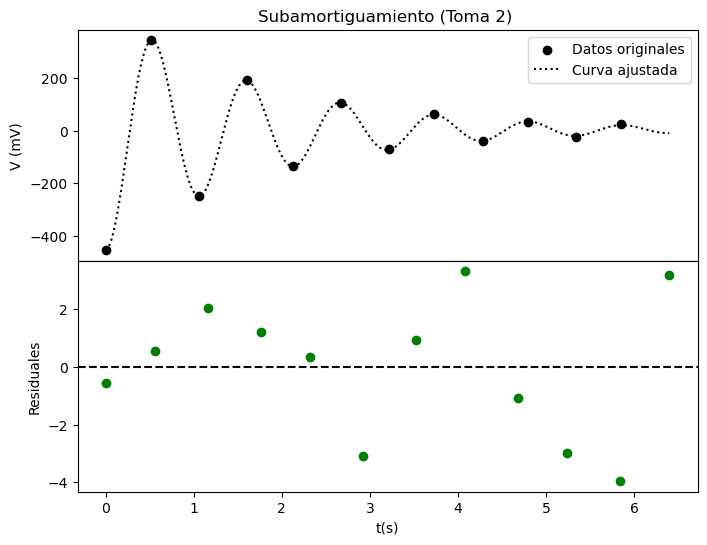

In [452]:
#Ajuste sobre los datos de la toma 1

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función exponencial multiplicada por un coseno
def func(x, a, b, c, d, e):
    return a * np.exp(b * x) * np.cos(c * x + d) + e

x_data = np.array(t2)
y_data = np.array(V2)

# Realizar la regresión no lineal
initial_guess = [x_data[0], -0.1, 4, np.pi, 0]  # Valores iniciales para los parámetros
params, covariance = curve_fit(func, x_data, y_data, p0=initial_guess)

# Calcular las incertidumbres a partir de la diagonal de la matriz de covarianza
param_uncertainties = np.sqrt(np.diag(covariance))

# Imprimir los parámetros ajustados y sus incertidumbres

for i, param in enumerate(params):
    param_name = f'Param_{i+1}'
    uncertainty = param_uncertainties[i]
    print(f'{param_name}: {param:.4f} ± {uncertainty:.4f}')

# Calcular los residuales
residuals = y_data - func(x_data, *params)

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Graficar los datos originales y la curva ajustada

x_prima = np.linspace(0,7,500) #Se genera un dominio para la regreción

ax1.scatter(x_data, y_data, label="Datos originales", color='black')
ax1.plot(x_prima, func(x_prima, *params), label="Curva ajustada", color='black',linestyle='dotted')
ax1.set_xlabel('t(s)')
ax1.set_ylabel('V (mV)')
ax1.legend()
ax1.set_title('Subamortiguamiento (Toma 2) ')

# Graficar los residuales en la parte inferior sin espacio entre los subplots
ax2.plot(x_data, residuals, 'o', color='green')
ax2.axhline(0, color='black', linestyle='--')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('Residuales')


# Ajustar los márgenes del segundo subplot
plt.subplots_adjust(hspace=0)

# Mostrar la figura
plt.show()

In [449]:
B_2 = -0.5095
dB_2 = 0.0063
#Propagacion de error del factor de calidad

Q_2 = - (omega_0)**2 /B_2
pre_prop_Q_2 = "(-1)*((1/B_2))*((omega_0)**2)" 
var_Q_2 = ['omega_0','B_2']
errs_Q_2 = [domega_0, dB_2]
prop_Q_2 = propagacion_de_error(pre_prop_Q_2, var_Q_2, errs_Q_2)

prop_Q_2

0.246844124556722*(omega_0**2/B_2**2 + 0.000651381634962386*omega_0**4/B_2**4)**0.5

In [434]:
#Inecetidumbre del factor de calidad
dQ_2 = 0.25 * np.sqrt( (0.00065)*((omega_0/B_2)**4) + (omega_0/B_2)**2  )


print(round(Q_2,5),round(dQ_2,5))

55.60081 2.70265
